In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv ('C:/Users/riosh/Downloads/archive (1)/Mall_Customers.csv')
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [5]:
import os
os.environ["OMP_NUM_THREADS"] = "1" 

In [7]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


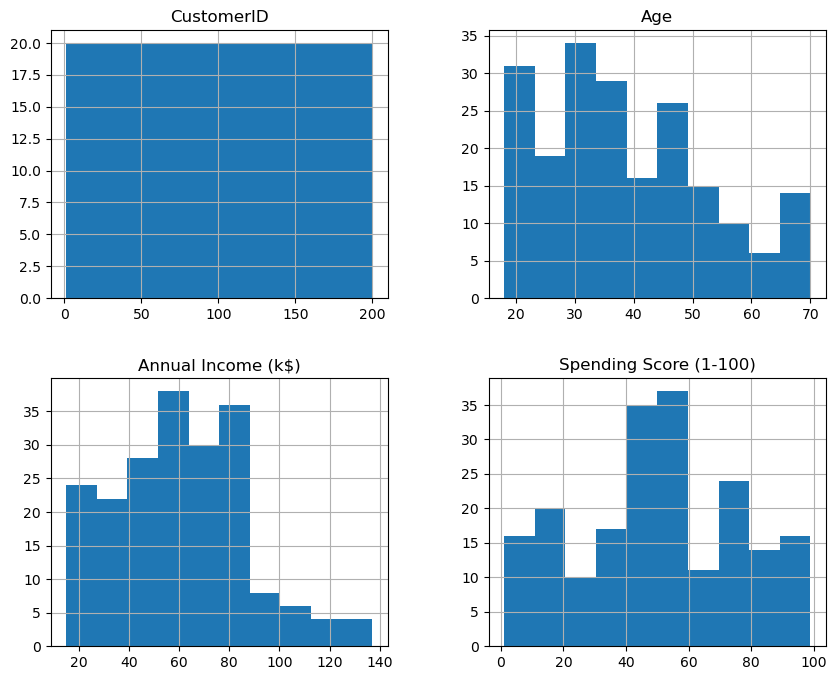

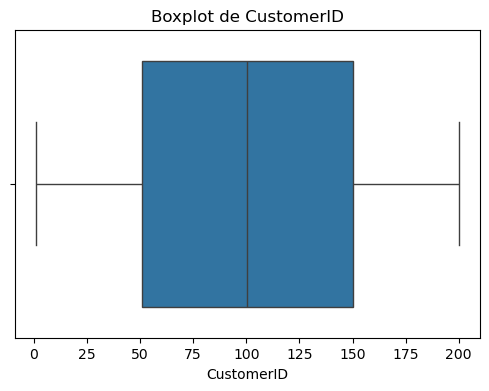

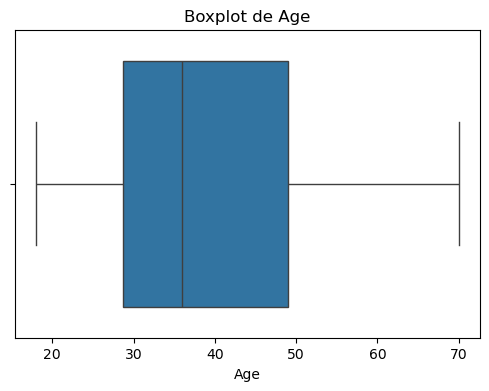

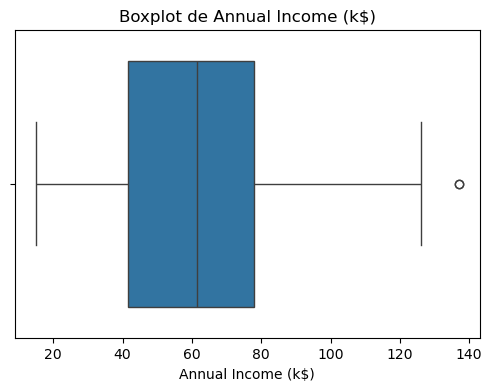

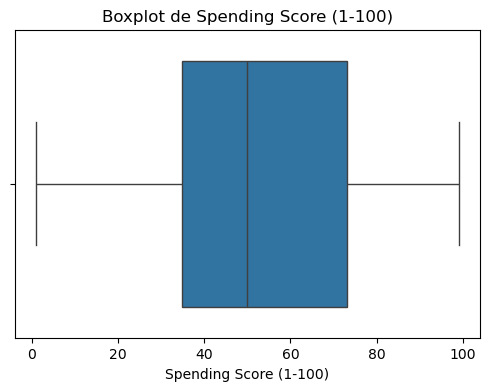

In [9]:
df.hist(bins=10, figsize=(10, 8))
plt.show()
for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')
    plt.show()


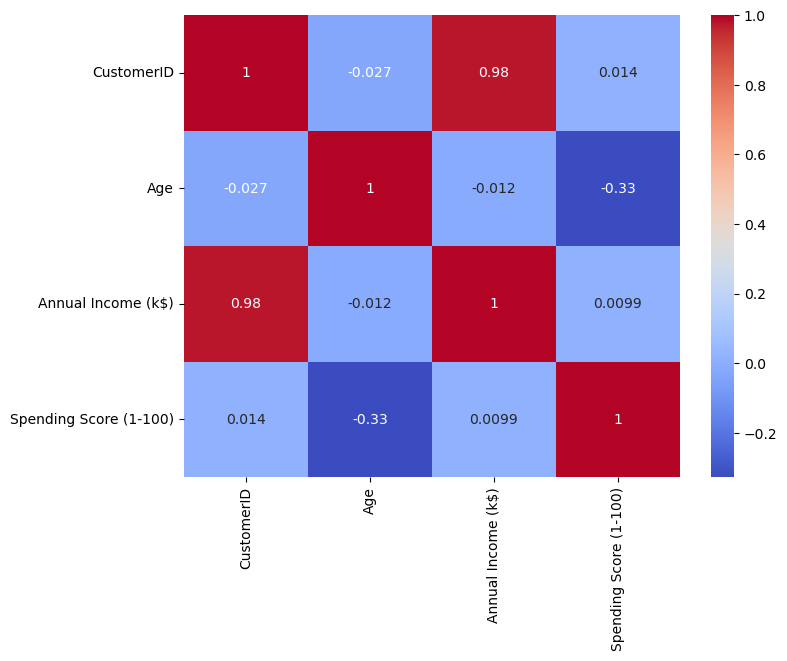

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.show()


In [11]:
df.isnull().sum()
df.dropna(inplace=True) 

In [12]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])


In [14]:
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]


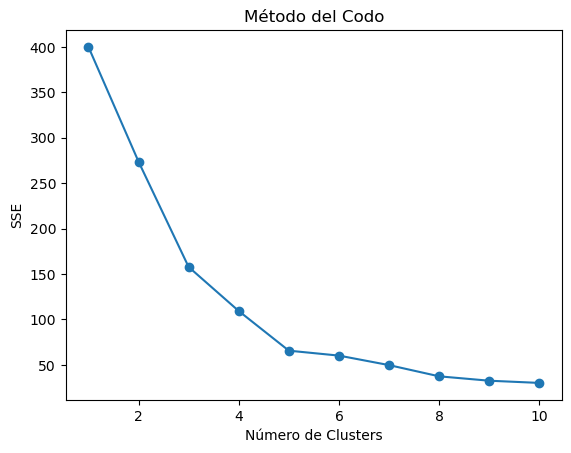

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.title('Método del Codo')
plt.show()


kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(features)
df['KMeans_Cluster'] = kmeans.labels_

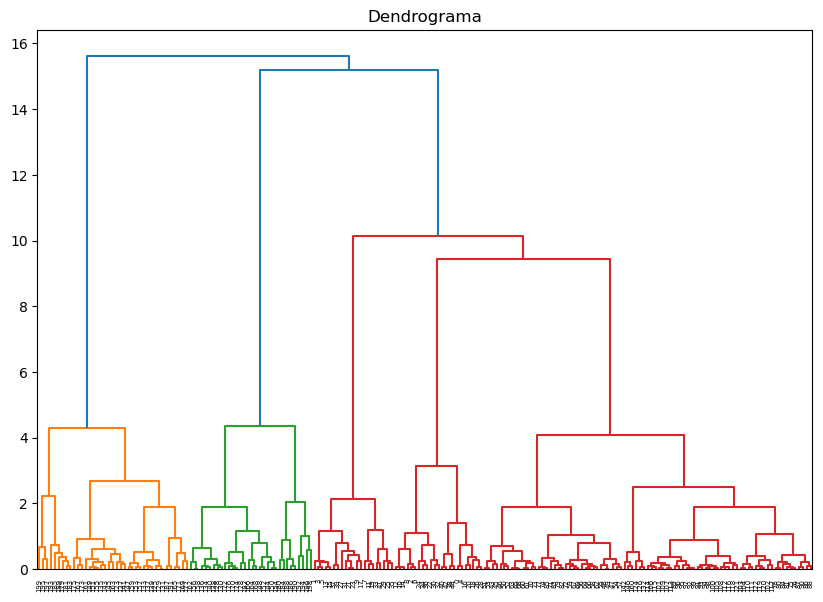

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(features, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrograma')
plt.show()

In [32]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
df['Hierarchical_Cluster'] = hierarchical.fit(features).labels_

In [34]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

silhouette_kmeans = silhouette_score(features, df['KMeans_Cluster'])
silhouette_hierarchical = silhouette_score(features, df['Hierarchical_Cluster'])

ch_kmeans = calinski_harabasz_score(features, df['KMeans_Cluster'])
ch_hierarchical = calinski_harabasz_score(features, df['Hierarchical_Cluster'])

print("Silhouette Score - KMeans:", silhouette_kmeans)
print("Silhouette Score - Hierarchical:", silhouette_hierarchical)
print("Calinski-Harabasz Index - KMeans:", ch_kmeans)
print("Calinski-Harabasz Index - Hierarchical:", ch_hierarchical)

Silhouette Score - KMeans: 0.554657163111109
Silhouette Score - Hierarchical: 0.5538089226688662
Calinski-Harabasz Index - KMeans: 248.64932001536357
Calinski-Harabasz Index - Hierarchical: 244.41032586596822


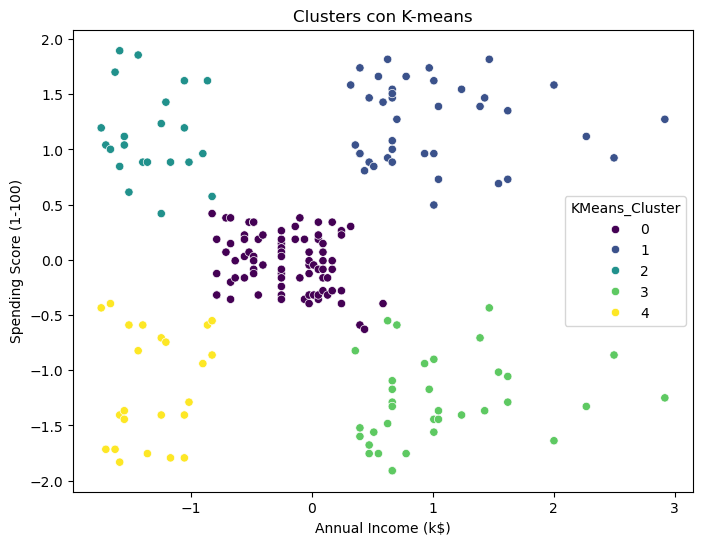

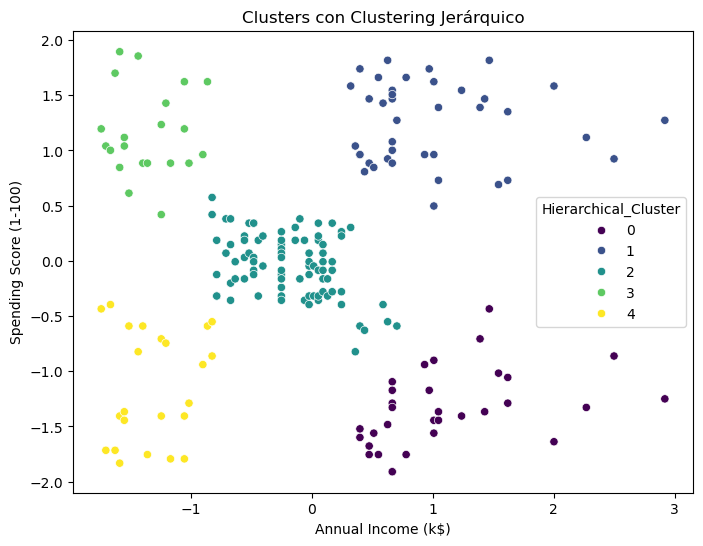

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', data=df, palette='viridis')
plt.title('Clusters con K-means')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Hierarchical_Cluster', data=df, palette='viridis')
plt.title('Clusters con Clustering Jerárquico')
plt.show()